**This notebook demonstrates basic gates and measurement**
$$
   \newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
   \newcommand{\ket}[1]{\left|{#1}\right\rangle}
   \newcommand{\bra}[1]{\left\langle{#1}\right|}
$$
For multi-qubit states, we use notation:
    $$\ket{n...21}$$
where $1$ is the first qubit, $2$ is the second qubit, $...$, $n$ is the last qubit. When displaying the circuit, the first qubit is at the top.

In [1]:
import os, sys
%matplotlib inline
import matplotlib.pyplot as plt
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.visualization import plot_histogram

# Import local tools
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import backend_tools

# Get a backend
IBMQ.load_accounts()
simulator = backend_tools.get_device(use_sim=True, min_qubits=5)

$X$ or $NOT$ gate
- is the NOT gate, or equivalently;
- $\pi$ rotation about the Bloch-sphere x-axis.

In the standard basis, the unitary matrix representing $X$ is:
$$
\begin{pmatrix}
0 & 1\\
1 & 0\\
\end{pmatrix}
$$

Note: measurement along the standard basis Bloch-sphere z-axis cannot provide any information about the qubit phase

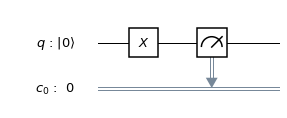

In [2]:
# Define the quantum circuit
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q, c)

# Apply the quantum gates
circuit.x(q[0])

# Finish off with the measurement along the z-axis
circuit.measure(q, c)

# Draw the circuit
circuit.draw(output="mpl")

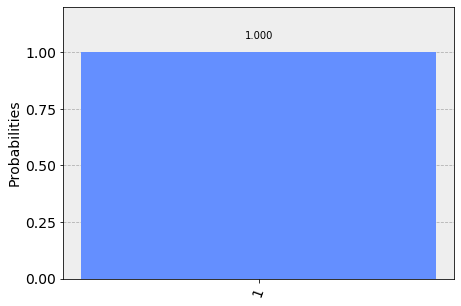

In [3]:
# Simulate or run the circuit
job = execute(circuit, backend=simulator, shots=1024)
result = job.result()

# Plot a histogram of the results
counts = result.get_counts(circuit)
plot_histogram(counts)

$H$ gate
- creates a superposition and is used to create the $\{\ket{+}, \ket{-}\}$ basis
- $\pi$ rotation about the Bloch-sphere x+z-axis.

It is also used for measurement about the Bloch-sphere x-axis:
- we can't physically measure along the x-axis, so we use $H$ to rotate the component of the qubit along the x-axis so that it points along the z-axis (which can be measured).

To create the Hadamard basis, $\{\ket{+}, \ket{-}\}$:
- apply H to $\ket{0}$ to create $\ket{+}$
- apply X to $\ket{0}$ (to create $\ket{1}$) and then apply $H$ to $\ket{1}$ to create $\ket{-}$

In the standard basis, the unitary matrix representing $H$ is:
$$
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1\\
\end{pmatrix}
$$

**Create a superposition and measure**

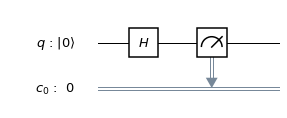

In [4]:
# Define the quantum circuit
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q, c)

# Apply the quantum gates
circuit.h(q[0])

## Finish off with the measurements
circuit.measure(q, c)

## Draw the circuit
circuit.draw(output="mpl")

In [ ]:
# Simulate or run the circuit
job = execute(circuit, backend=simulator, shots=1024)
result = job.result()

# Plot a histogram of the results
counts = result.get_counts(circuit)
plot_histogram(counts)

**Measure in the Bloch-sphere x-axis**

In [ ]:
# Define the quantum circuit
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q, c)

# Apply the quantum gates
# - construct |+>
circuit.h(q[0])
# - to measure along x-axis, rotate about x+z and then measure along z-axis
circuit.h(q[0])

## Finish off with the measurements
circuit.measure(q, c)

## Draw the circuit
circuit.draw(output="mpl")

In [ ]:
# Simulate or run the circuit
job = execute(circuit, backend=simulator, shots=1024)
result = job.result()

# Plot a histogram of the results
counts = result.get_counts(circuit)
plot_histogram(counts)

**Gates which impart a complex phase**

To construct qubits with a complex component, we can rotate $\ket{+}$ about the Bloch-sphere z-axis using these gates (*i.e.* phase rotations):
- $Z$ gate: $\pi$ rotation about z-axis. In the standard basis it has represention:
$$Z =
\begin{pmatrix}
1 & 0\\
0 & -1\\
\end{pmatrix} := T^4
$$
- $S$ gate: $\frac{\pi}{2}$ rotation about z-axis (phase flip). In the standard basis it has represention:
$$S =
\begin{pmatrix}
1 & 0\\
0 & i\\
\end{pmatrix} := T^2
$$
- $S^{\dagger}$ gate: $-\frac{\pi}{2}$ rotation about z-axis (phase flip). In the standard basis it has represention:
$$S^\dagger =
\begin{pmatrix}
1 & 0\\
0 & -i\\
\end{pmatrix} := T^6
$$
- $T$ gate: $\frac{\pi}{4}$ rotation about z-axis. In the standard basis it has represention:
$$T =
\begin{pmatrix}
1 & 0\\
0 & e^{i\pi/4}\\
\end{pmatrix}
$$
- $T^{\dagger}$ gate: $-\frac{\pi}{4}$ rotation about z-axis. In the standard basis it has represention:
$$T^{\dagger} =
\begin{pmatrix}
1 & 0\\
0 & e^{-i\pi/4}\\
\end{pmatrix} := T^7
$$
- $Y$ gate: $\pi$ rotation about z-axis followed by flip (NOT). In the standard basis it has represention:
$$Y =
\begin{pmatrix}
0 & -i\\
i & 0\\
\end{pmatrix} := XZ
$$

*Example 1*

In [ ]:
# Define the quantum circuit
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q, c)

# Apply the quantum gates
# - construct |+>
circuit.h(q[0])
# - rotate by 3.pi/4 about z-axis
circuit.s(q[0])
circuit.t(q[0])
# - to measure along x-axis, rotate about x+z and then measure along z-axis
circuit.h(q[0])

## Finish off with the measurements
circuit.measure(q, c)

## Draw the circuit
circuit.draw(output="mpl")

In [ ]:
# Simulate or run the circuit
job = execute(circuit, backend=simulator, shots=1024)
result = job.result()

# Plot a histogram of the results
counts = result.get_counts(circuit)
plot_histogram(counts)

*Example 2 - run a series of circuits*

Note: this example is taken from the IBM User Guide, but the results don't match those in the Guide

In [ ]:
import numpy as np

# Define the quantum circuit
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')

# Build a series of circuits:
# 1. |+>, followed by measurement in the Hadamard basis
# 2. |+>, apply T gate (pi/4 phase rotation), followed by measurement in the Hadamard basis
#     ...
# 8. |+>, apply seven T gates successively, followed by measurement in the Hadamard basis
circuits = []
pre = QuantumCircuit(q, c)
pre.h(q)
pre.barrier()
middle = QuantumCircuit(q, c)
meas_x = QuantumCircuit(q, c)
meas_x.barrier()
meas_x.h(q)
meas_x.measure(q, c)
exp_vector = range(0,8)
for exp_index in exp_vector:
    circuits.append(pre + middle + meas_x)
    middle.t(q)

# Execute the circuits
shots = 5000
job = execute(circuits, backend=simulator, shots=shots, seed_simulator=8)
result = job.result()

# Print the result
T=' '
for exp_index in exp_vector:
    data = result.get_counts(circuits[exp_index])
    try:
        p0 = data['0']/shots
    except KeyError:
        p0 = 0
    try:
        p1 = data['1']/shots
    except KeyError:
        p1 = 0
    print('Exp {}, |+>,{:8s}, measure: [{:.3f}, {:.3f}] Y length = {:.3f}'.format(exp_index, T, p0, p1, p0-p1))
    T += 'T'

**Circular basis**

The circular basis consists of:
$$
\begin{eqnarray}
\ket{\circlearrowright} &=& \frac{1}{\sqrt{2}}\left(\ket{0} + i\ket{1}\right)\\
\ket{\circlearrowleft} &=& \frac{1}{\sqrt{2}}\left(\ket{0} - i\ket{1}\right)\\
\end{eqnarray}
$$
To create the circular basis from $\{\ket{0}$:
- apply H to $\ket{0}$ to create $\ket{+}$ and then apply $S$ to $\ket{+}$ to create $\ket{\circlearrowright}$
- apply H to $\ket{0}$ to create $\ket{+}$ and then apply $S^\dagger$ to $\ket{+}$ to create $\ket{\circlearrowleft}$

To measure in this basis we need to rotate the circular basis (Y) onto the computational basis (Z):
- reverse the phase rotation, by applying $S^\dagger$ (taking us to the superposition or Hadamard basis)
- appky $H$ to take us to the computational basis. 


*Example - measurement in the circular basis*

Note: this example is taken from the IBM User Guide, but the results don't match those in the Guide

In [ ]:
import numpy as np

# Define the quantum circuit
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')

# Build a series of circuits:
# 1. |+>, followed by measurement in the circular basis
# 2. |+>, apply T gate (pi/4 phase rotation), followed by measurement in the circular basis
#     ...
# 8. |+>, apply seven T gates successively, followed by measurement in the circular basis
circuits = []
pre = QuantumCircuit(q, c)
pre.h(q)
pre.barrier()
middle = QuantumCircuit(q, c)
meas_y = QuantumCircuit(q, c)
meas_y.barrier()
meas_y.sdg(q)
meas_y.h(q)
meas_y.measure(q, c)
exp_vector = range(0,8)
for exp_index in exp_vector:
    circuits.append(pre + middle + meas_y)
    middle.t(q)
    
# Execute all the circuits
shots = 1024
job = execute(circuits, backend=simulator, shots=shots, seed_simulator=8)
result = job.result()

# Print the result
T=' '
for exp_index in exp_vector:
    data = result.get_counts(circuits[exp_index])
    try:
        p0 = data['0']/shots
    except KeyError:
        p0 = 0
    try:
        p1 = data['1']/shots
    except KeyError:
        p1 = 0
    print('Exp {}, |+>,{:8s}, measure: [{:.3f}, {:.3f}] Y length = {:.3f}'.format(exp_index, T, p0, p1, p0-p1))
    T += 'T'

**Controlled NOT gate**

The target qubit is flipped (*i.e.* apply the $NOT$ or $X$ gate) *iff* the control bit is $\ket{1}$.

In [ ]:
# Define the quantum circuit
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q, c)

# Apply the quantum gates
# - construct |01>
circuit.x(q[0])
# - apply CNOT (the first argument is the control qubit, the second argument is the target qubit)
circuit.cx(q[0], q[1])

# Finish off with the measurements
circuit.measure(q, c)

# Draw the circuit
circuit.draw(output="mpl")

In [ ]:
# Simulate or run the circuit
job = execute(circuit, backend=simulator, shots=1024)
result = job.result()

# Plot a histogram of the results
counts = result.get_counts(circuit)
plot_histogram(counts)